<a href="https://colab.research.google.com/github/NVHarikaVIT/Shree_Cement_Internship/blob/main/Shree_Cement_Data_Analysis_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Title of Project**

---

# Data Analysis of Shree Cement's transportation of goods

**Objective**

The main goal of this project is to analyse the trends followed in dispatching the goods. The dataset with more than 100,000 rows is provided with detailed information about its transportation in all the states of India.

**Datasets**
1. Dispatch file with all information in detail.
2. Target file.

**Variables Description**

ORGANIZATION_ID: The unique identifier for the organization.

PRODUCT: The type of cement product.

ORDERED_QTY: The quantity of the product ordered by the customer.

SHIPPED_QTY: The quantity of the product that was actually shipped.

TRUCK_TYPE: The type of truck used for shipping.

PACK_TYPE: The type of packaging used for the product.

PACK_MAT: The material used for packaging.

MODE_OF_TRANSPORT: The mode of transport used for shipping (e.g., road, rail, air, sea).

DISTANCE: The distance between the shipping point and the delivery point.

FRT_AMT: The freight amount for the shipment.

PRIMARY_FRT: The primary freight route used for the shipment.

DI_SO: The sales order number associated with the dispatch instruction.

TOKEN_NO: The unique token number assigned to the shipment.

CHUTE_NAME: The name of the chute from where the cement is loaded onto the truck.

DI_DATE: The date of the dispatch instruction.

RAKE_POINT: The point where the cement is loaded onto the rake for rail transport.

UNLOADING_AMT: The amount charged for unloading the shipment.

CUST_CATEGORY: The category of the customer (e.g., retailer, wholesaler, direct customer).

CUST_SUB_CATEGORY: The sub-category of the customer within the main category.

SHIP_CITY: The city where the shipment is delivered.

SHIP_TALUKA: The taluka (administrative division in India) where the shipment is delivered.

SHIP_DISTRICT: The district where the shipment is delivered.

SHIP_STATE: The state where the shipment is delivered.

BRAND: The brand of the cement product.

ORDER_NUMBER: The unique number assigned to the order.

LINE_AMT: The amount for the line item in the order.

TAX_AMT: The tax amount for the order.

TOTAL_AMT: The total amount for the order including tax.

SHIP_PRICE: The price of the shipment.

ROUTE_ID: The unique identifier for the shipping route.

### **Import necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats

### **Import datasets**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dispatch_info = pd.read_csv('/content/drive/My Drive/Sample_dispatch_data.csv')
target =  pd.read_csv('/content/drive/My Drive/Target.csv')

In [ ]:
print('Size of dispatch data: ', dispatch_info.shape)
print('Size of target data: ', target.shape)

Size of dispatch data:  (141087, 30)
Size of target data:  (434, 2)


## **Descriptive Statistics**

In [ ]:
dispatch_info.describe(include='all')

,ORGANIZATION_ID,PRODUCT,ORDERED_QTY,SHIPPED_QTY,TRUCK_TYPE,PACK_TYPE,PACK_MAT,MODE_OF_TRANSPORT,DISTANCE,FRT_AMT,...,SHIP_TALUKA,SHIP_DISTRICT,SHIP_STATE,BRAND,ORDER_NUMBER,LINE_AMT,TAX_AMT,TOTAL_AMT,SHIP_PRICE,ROUTE_ID
count,141087.000000,141083,1.410870e+05,141087.000000,139621,141087,113731,141087,141087.000000,1.328400e+05,...,141085,141085,141085,141087,1.410870e+05,1.410870e+05,1.410870e+05,1.410870e+05,132840.000000,141087
unique,NaN,10,NaN,NaN,23,7,3,3,NaN,NaN,...,2078,434,21,5,NaN,NaN,NaN,NaN,NaN,7879
top,NaN,PPC,NaN,NaN,Trailor-Open Body,Cement Packed,HDPE,Road,NaN,NaN,...,SIMGA,BALODA BAZAR,RAJASTHAN,SHREE,NaN,NaN,NaN,NaN,NaN,P24974
freq,NaN,75425,NaN,NaN,46757,106662,89742,139945,NaN,NaN,...,8033,8572,25189,58847,NaN,NaN,NaN,NaN,NaN,7759
mean,32.097954,NaN,1.798251e+05,31.436447,NaN,NaN,NaN,NaN,212.639627,2.286127e+04,...,NaN,NaN,NaN,NaN,2.483473e+09,9.651718e+04,2.636598e+04,1.228832e+05,733.489759,NaN
std,47.984109,NaN,5.895588e+05,137.136908,NaN,NaN,NaN,NaN,174.608216,5.289450e+04,...,NaN,NaN,NaN,NaN,2.781871e+09,2.231627e+05,5.864230e+04,2.796341e+05,400.869366,NaN
min,0.000000,NaN,1.800000e-02,0.018000,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,...,NaN,NaN,NaN,NaN,9.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.010000,NaN
25%,5.000000,NaN,3.000000e+01,13.000000,NaN,NaN,NaN,NaN,70.000000,6.394225e+03,...,NaN,NaN,NaN,NaN,3.457315e+05,4.311813e+03,3.288148e+02,5.494703e+03,440.000000,NaN
50%,12.000000,NaN,2.000000e+02,26.000000,NaN,NaN,NaN,NaN,164.000000,1.439900e+04,...,NaN,NaN,NaN,NaN,4.112490e+05,7.916997e+04,2.164459e+04,1.009447e+05,683.000000,NaN
75%,42.000000,NaN,5.000000e+04,40.540000,NaN,NaN,NaN,NaN,337.000000,3.105000e+04,...,NaN,NaN,NaN,NaN,5.600004e+09,1.401962e+05,3.892050e+04,1.789289e+05,1000.000000,NaN


In [ ]:
dispatch_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141087 entries, 0 to 141086
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ORGANIZATION_ID    141087 non-null  int64  
 1   PRODUCT            141083 non-null  object 
 2   ORDERED_QTY        141087 non-null  float64
 3   SHIPPED_QTY        141087 non-null  float64
 4   TRUCK_TYPE         139621 non-null  object 
 5   PACK_TYPE          141087 non-null  object 
 6   PACK_MAT           113731 non-null  object 
 7   MODE_OF_TRANSPORT  141087 non-null  object 
 8   DISTANCE           141087 non-null  int64  
 9   FRT_AMT            132840 non-null  float64
 10  PRIMARY_FRT        132840 non-null  float64
 11  DI_SO              141087 non-null  object 
 12  TOKEN_NO           139659 non-null  float64
 13  CHUTE_NAME         140763 non-null  object 
 14  DI_DATE            141087 non-null  object 
 15  RAKE_POINT         141087 non-null  object 
 16  UN

In [ ]:
dispatch_info.drop(['UNLOADING_AMT'], axis=1, inplace=True)
# removed the column since it contains more missing information

# **Data Cleaning and Preprocessing**

### 1. Correcting the format of date datatype.

In [ ]:
dispatch_info['DI_DATE'] = pd.to_datetime(dispatch_info['DI_DATE'])
dispatch_info['DI_DATE'].dtype

dtype('<M8[ns]')

### 2. Checking types of values in each column.

In [ ]:
for col in dispatch_info.columns:
  print(dispatch_info[col].value_counts(dropna=False))

ORGANIZATION_ID
40     21142
2      16335
5       9472
70      8992
41      8655
3       7736
10      7679
44      7088
12      6623
42      6411
73      6145
4       6015
9       5804
7       5151
45      5006
0       4026
6       3404
301     3369
11      1147
8        608
71       279
Name: count, dtype: int64
PRODUCT
PPC                 75425
Clinker             24291
OPC43               18647
PPC PREMIUM          9522
OPC53                5700
CC                   4476
Synthetic Gypsum     1812
AAC                  1068
Rubble                 79
OPC                    63
NaN                     4
Name: count, dtype: int64
ORDERED_QTY
50000.00      33025
500000.00      8283
3000000.00     5130
10.00          5101
35.00          4372
              ...  
4.55              1
45.61             1
39.35             1
45.35             1
0.41              1
Name: count, Length: 1007, dtype: int64
SHIPPED_QTY
25.000    11276
10.000     8990
20.000     7687
5.000      6727
30.000     6662
 

### 3. Detecting and handling missing values

In [ ]:
#Count of missing values
missing_count = dispatch_info.isnull().sum().sum()
print('No. of missing values: ', missing_count)
# Numerical columns
num_cols = [col for col in dispatch_info.columns if ((dispatch_info[col].dtype == 'int64') or (dispatch_info[col].dtype == 'float64'))]
# Categorical columns
cat_cols = [col for col in dispatch_info.columns if ((dispatch_info[col].dtype != 'int64') and (dispatch_info[col].dtype != 'float64'))]

No. of missing values:  57526


In [ ]:
# replace NaN with mean
for col in num_cols:
  dispatch_info[col].fillna(np.nanmean(dispatch_info[col]), inplace=True)
# replace NaN with Unknown
for cols in cat_cols:
  dispatch_info[cols].replace(np.nan, 'Unknown', inplace=True)

print('No. of missing values: ', dispatch_info.isnull().sum().sum())

No. of missing values:  0


### 4. Finding the outliers of the given dataset.

In [ ]:
def outlier(df):
  for c in df.columns:
    if df[c].dtype == 'int64' or df[c].dtype == 'float64':
      q1 = np.percentile(df[c], 25)
      q3 = np.percentile(df[c], 75)
      iqr = q3 - q1
      lower_bound = q1 - (1.5 * iqr)
      upper_bound = q3 + (1.5 * iqr)
      print(c, '-'*50)
      outs = [x for x in df[c] if ((x < lower_bound) or (x > upper_bound))]
      # The below two lines indicate dropping the outliers
      dispatch_info.drop(dispatch_info[dispatch_info[c] > upper_bound].index, inplace=True)
      dispatch_info.drop(dispatch_info[dispatch_info[c] < lower_bound].index, inplace=True)
outlier(dispatch_info)

ORGANIZATION_ID --------------------------------------------------
ORDERED_QTY --------------------------------------------------
SHIPPED_QTY --------------------------------------------------
DISTANCE --------------------------------------------------
FRT_AMT --------------------------------------------------
PRIMARY_FRT --------------------------------------------------
TOKEN_NO --------------------------------------------------
ORDER_NUMBER --------------------------------------------------
LINE_AMT --------------------------------------------------
TAX_AMT --------------------------------------------------
TOTAL_AMT --------------------------------------------------
SHIP_PRICE --------------------------------------------------


In [ ]:
dispatch_info.shape

(108490, 29)

# **Exploratory Data Analysis (EDA)**

### 1. Most frequently used rake points for shipping.

Rake points used for shipping: 
 RAKE_POINT
SCL-Raipur            10128
SCL-Khushkhera         9441
SCL-Aurangabad - 1     8342
SCL-UPGU               7632
SCL RNCU               7177
SCL-Jharkhand          6698
SCL-Kodla              6520
SCL-Panipat            6495
SCL-Patas              6121
SCL-Aurangabad - 2     6026
SCL-Suratgarh -II      5557
SCL Ras                5334
SCL-Roorkee            5111
SCL-Cuttack            4992
SCL-Nawalgarh          4636
SCL-Jobner             3404
SCL Beawar             3042
SCL-UPGU AAC            992
SCL-Suratgarh -I        563
SCL-Guntur              279
Name: count, dtype: int64


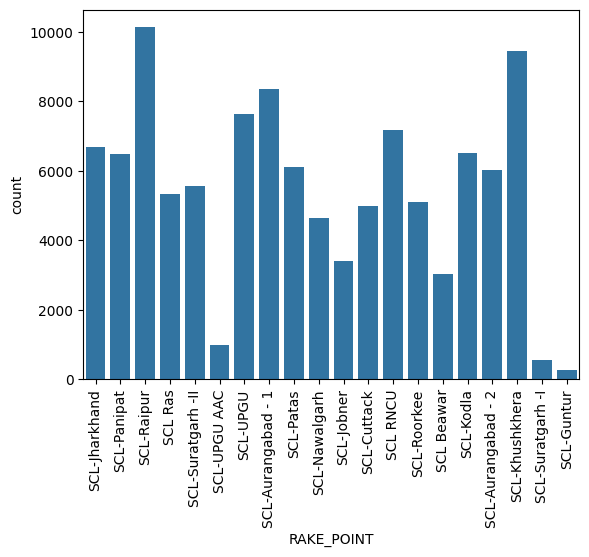

In [ ]:
print('Rake points used for shipping: \n', dispatch_info['RAKE_POINT'].value_counts())
# visualization
sns.countplot(x='RAKE_POINT', data=dispatch_info)
plt.xticks(rotation=90)
plt.show()

Interpretation: SCL-Raipur is the most frequently used rake point.

### 2. State-wise average amount spent for the ship price.

State wise ship price: 
            SHIP_STATE   SHIP_PRICE
0      ANDHRA PRADESH  1019.066465
1               BIHAR   743.154298
2          CHANDIGARH   723.333333
3         CHATTISGARH   643.314763
4               DELHI   655.363645
5             GUJARAT  1057.677138
6             HARYANA   610.704578
7    HIMACHAL PRADESH   933.261682
8   JAMMU AND KASHMIR  1550.000000
9           JHARKHAND   888.715261
10          KARNATAKA   779.666706
11     MADHYA PRADESH  1114.597688
12        MAHARASHTRA   813.826014
13             ODISHA   842.793530
14             PUNJAB   893.491417
15          RAJASTHAN   579.739409
16          TELANGANA   759.590301
17      UTTAR PRADESH   578.356572
18        UTTARAKHAND   503.772272
19            Unknown  1364.000000
20        WEST BENGAL   735.060373


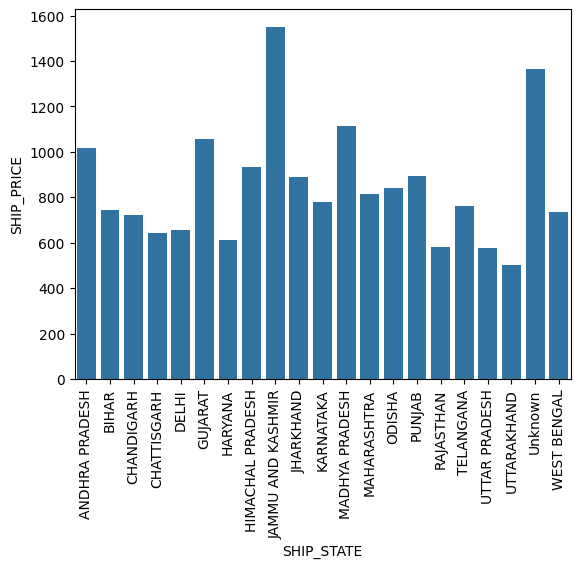

In [ ]:
ship_avg = dispatch_info.groupby('SHIP_STATE', as_index=False)['SHIP_PRICE'].mean()
print('State wise ship price: \n', ship_avg)
#visualization
sns.barplot(x='SHIP_STATE', y='SHIP_PRICE', data=ship_avg)
plt.xticks(rotation=90)
plt.show()

Interpretation: Jammu and Kashmir spent more cost for shipping than other states in India.


### 3. Types of brands shipped by the company with their quantity in statewise.

State-wise brands shipped: 
         SHIP_STATE   BRAND  SHIPPED_QTY
0   ANDHRA PRADESH  BANGUR     1695.000
1   ANDHRA PRADESH   MAGNA     3428.000
2   ANDHRA PRADESH  OTHERS        0.408
3   ANDHRA PRADESH   SHREE     8363.275
4            BIHAR  BANGUR   105018.000
..             ...     ...          ...
74     UTTARAKHAND   SHREE    46928.179
75         Unknown   SHREE       60.000
76     WEST BENGAL  BANGUR      142.900
77     WEST BENGAL  OTHERS    29451.420
78     WEST BENGAL   SHREE       65.900

[79 rows x 3 columns]


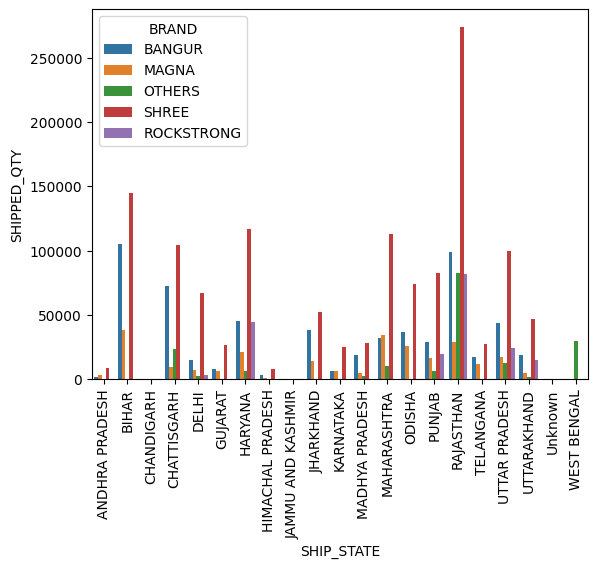

In [ ]:
state_brand = dispatch_info[['SHIP_STATE','BRAND','SHIPPED_QTY']]
states_grp = state_brand.groupby(['SHIP_STATE','BRAND'], as_index=False).sum()
print('State-wise brands shipped: \n', states_grp)
#visualization
sns.barplot(x='SHIP_STATE', y='SHIPPED_QTY', hue='BRAND', data=states_grp)
plt.xticks(rotation=90)
plt.show()

### 4. Variation of products purchased by different categories of customers.

In [ ]:
cust_prod_grp = dispatch_info[['CUST_SUB_CATEGORY','PRODUCT', 'ORDERED_QTY']]
cust_prod = cust_prod_grp.groupby(['CUST_SUB_CATEGORY','PRODUCT'], as_index=False).sum()
print('Variation of products purchased by different categories of customers: \n', cust_prod)

Variation of products purchased by different categories of customers: 
        CUST_SUB_CATEGORY           PRODUCT  ORDERED_QTY
0   Builder & Developers               AAC     13240.50
1   Builder & Developers           Clinker  55120000.00
2   Builder & Developers             OPC43     69385.29
3   Builder & Developers             OPC53     16950.83
4   Builder & Developers               PPC     72509.53
..                   ...               ...          ...
74           Transporter  Synthetic Gypsum     57660.00
75               Unknown             OPC43  22014500.00
76               Unknown             OPC53     50500.00
77               Unknown               PPC  22386350.00
78               Unknown       PPC PREMIUM   3827000.00

[79 rows x 3 columns]


### 5. Plotting the dependency of ship price on the basis of ordered quantity.

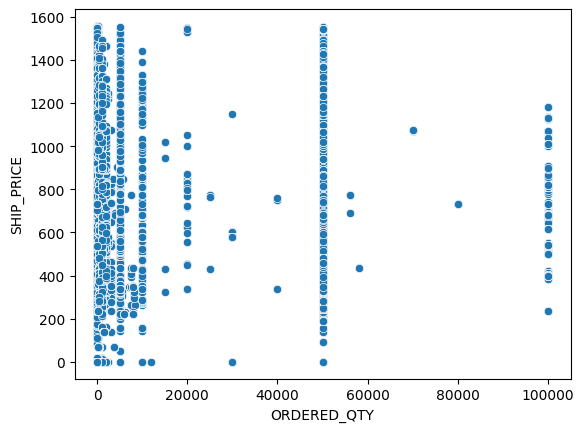

In [ ]:
sns.scatterplot(x='ORDERED_QTY', y='SHIP_PRICE', data=dispatch_info)
plt.show()

Interpretation: The above plot indicates that there's no linear
dependence between these variables.

### 6. Which types of trucks are mostly used to ship 'SHREE' products in Andhra Pradesh?

The most common truck type used to ship Shree products in AP:  Turbo-Open Body


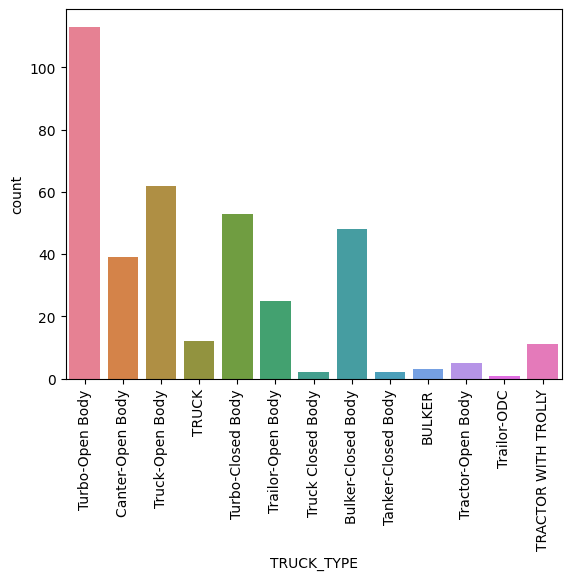

In [ ]:
truck_ships = dispatch_info[['TRUCK_TYPE','BRAND','SHIP_STATE']]
truck_Shree = truck_ships[truck_ships['BRAND']=='SHREE']
Shree_AP = truck_Shree[truck_Shree['SHIP_STATE']=='ANDHRA PRADESH']
print('The most common truck type used to ship Shree products in AP: ', Shree_AP['TRUCK_TYPE'].mode()[0])
#visualization
sns.countplot(x='TRUCK_TYPE',data=Shree_AP, hue='TRUCK_TYPE', legend='auto')
plt.xticks(rotation=90)
plt.show()

### 7. Relation of tax amount with ship price.

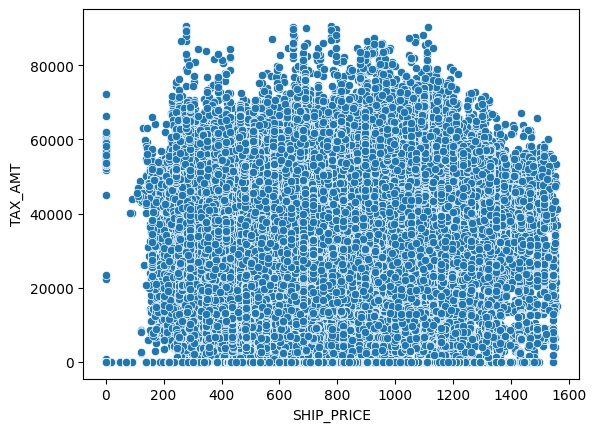

In [ ]:
sns.scatterplot(x='SHIP_PRICE',y='TAX_AMT',data=dispatch_info)
plt.show()

Interpretation: These variables are also not linearly dependent.

### 8. Mostly used package material for Shree Cement brand and preferred mode of transport.

Mostly used package material for Shree Cement brand :  HDPE  and the preferred mode of transport:  Road


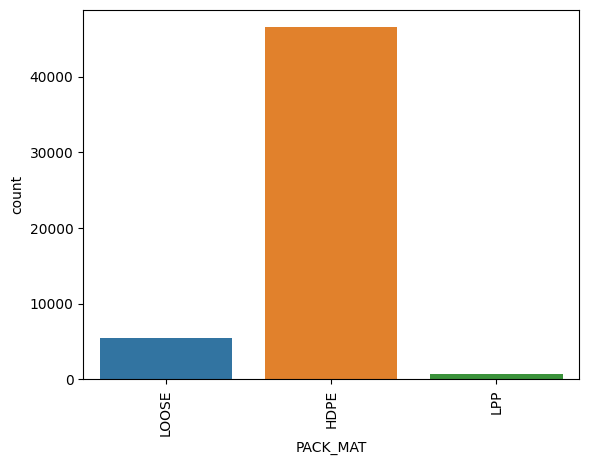

In [ ]:
pack_shree_prod = dispatch_info[['PACK_MAT','BRAND', 'MODE_OF_TRANSPORT']]
pack_shree = pack_shree_prod[pack_shree_prod['BRAND']=='SHREE']
print('Mostly used package material for Shree Cement brand : ', pack_shree['PACK_MAT'].mode()[0], end=' ')
print(' and the preferred mode of transport: ', pack_shree['MODE_OF_TRANSPORT'].mode()[0])
#visualization
sns.countplot(x='PACK_MAT', data=pack_shree, hue='PACK_MAT')
plt.xticks(rotation=90)
plt.show()

Interpretation: This indicates that most of the ordered products are not shipped to their destinations.

### 9. Identifying the difference betweeen input and target datasets.

In [ ]:
ship_districts = dispatch_info.groupby('SHIP_DISTRICT', as_index=False)['SHIPPED_QTY'].sum()
# identifying the differences
"""if target qty - input qty > 0
      then district hasn't reached the target
  else
       then district has reached the target
"""
improved_districts  = target['SHIP_DISTRICT'][(target['TARGET'] -ship_districts['SHIPPED_QTY']) <= 0]
print('Districts that have reached the target: \n', improved_districts, f' and their count is {improved_districts.shape[0]}')

Districts that have reached the target: 
 0            ADILABAD
4          AHMEDNAGAR
6               AKOLA
7             ALIGARH
10     AMBEDKAR NAGAR
            ...      
402          SURYAPET
407             Surat
408              TAPI
411              TONK
412            TUMKUR
Name: SHIP_DISTRICT, Length: 196, dtype: object  and their count is 196


In [ ]:
not_reached_districts = target['SHIP_DISTRICT'][(target['TARGET'] -ship_districts['SHIPPED_QTY']) > 0]
print('Districts that have reached the target: \n', not_reached_districts, f' and their count is {not_reached_districts.shape[0]}')

Districts that have reached the target: 
 1                  AGAR
2                  AGRA
3             AHMEDABAD
5                 AJMER
8                 ALWAR
             ...       
404            Shahdara
405    South East Delhi
406    South West Delhi
409         TARANTAARAN
410               THANE
Name: SHIP_DISTRICT, Length: 217, dtype: object  and their count is 217


### 10. Identifying the key factors that are influencing the shipped quantity.

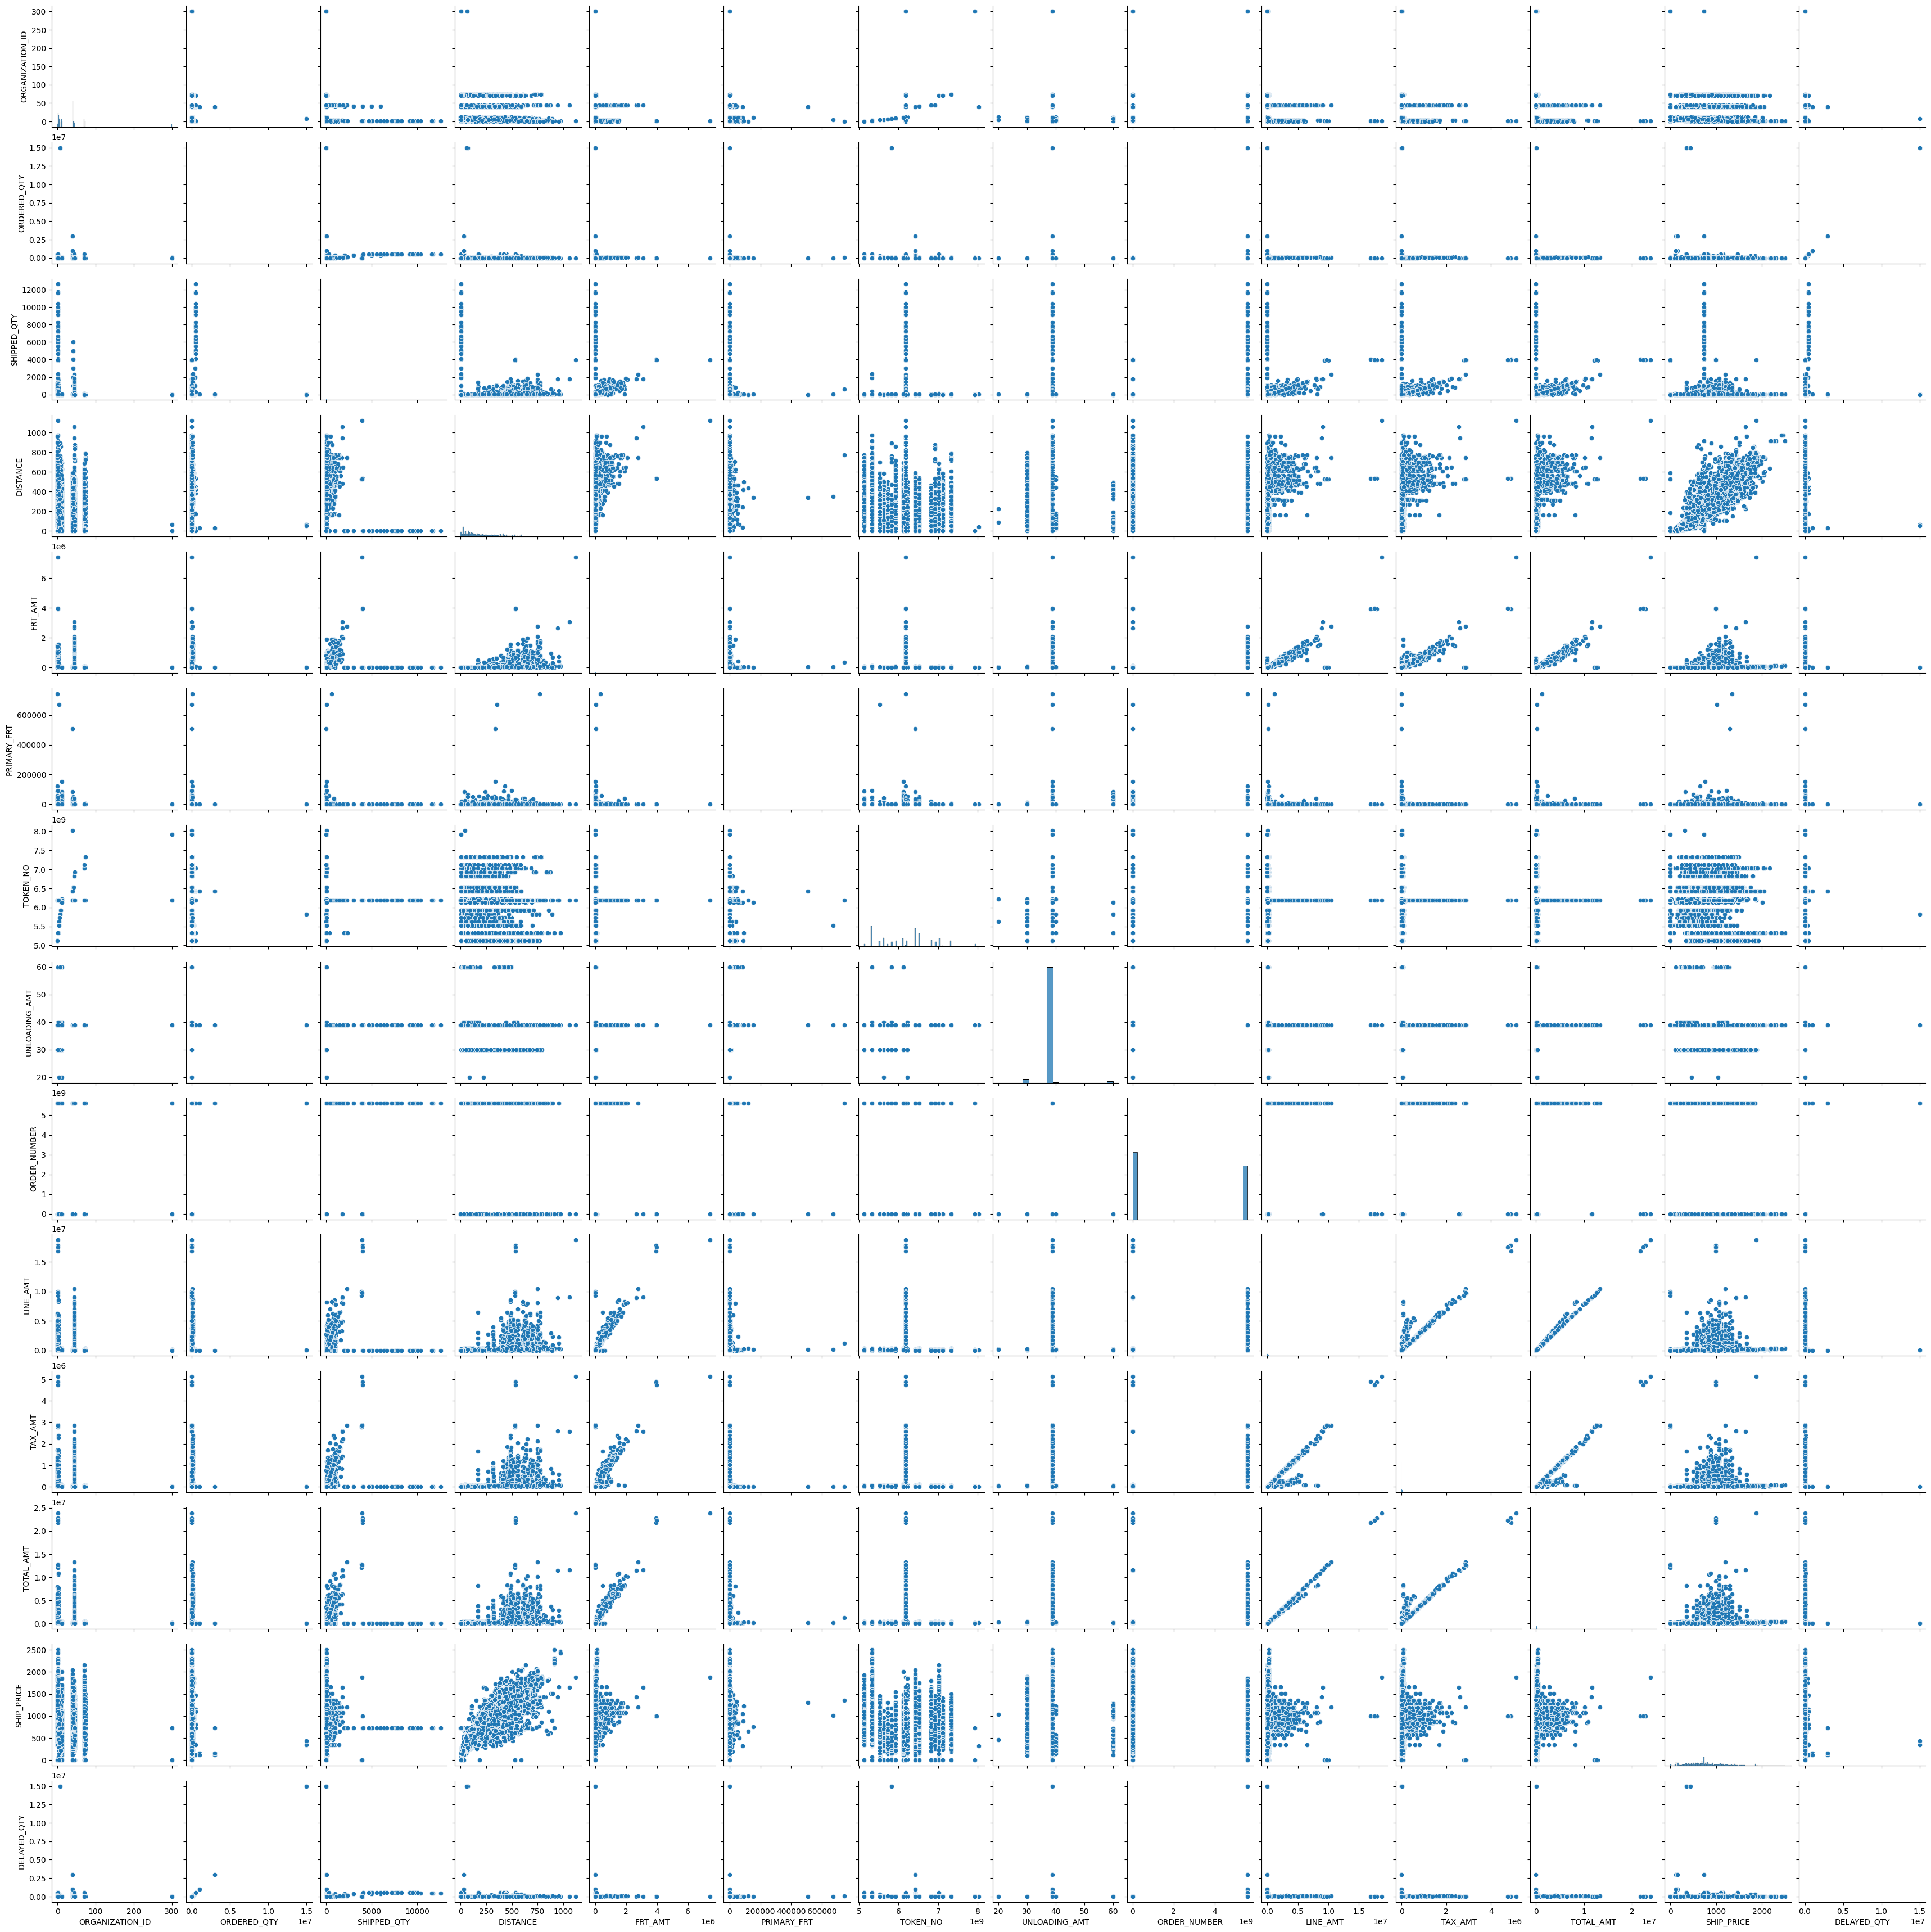

In [ ]:
sns.pairplot(data=dispatch_info)
plt.show()

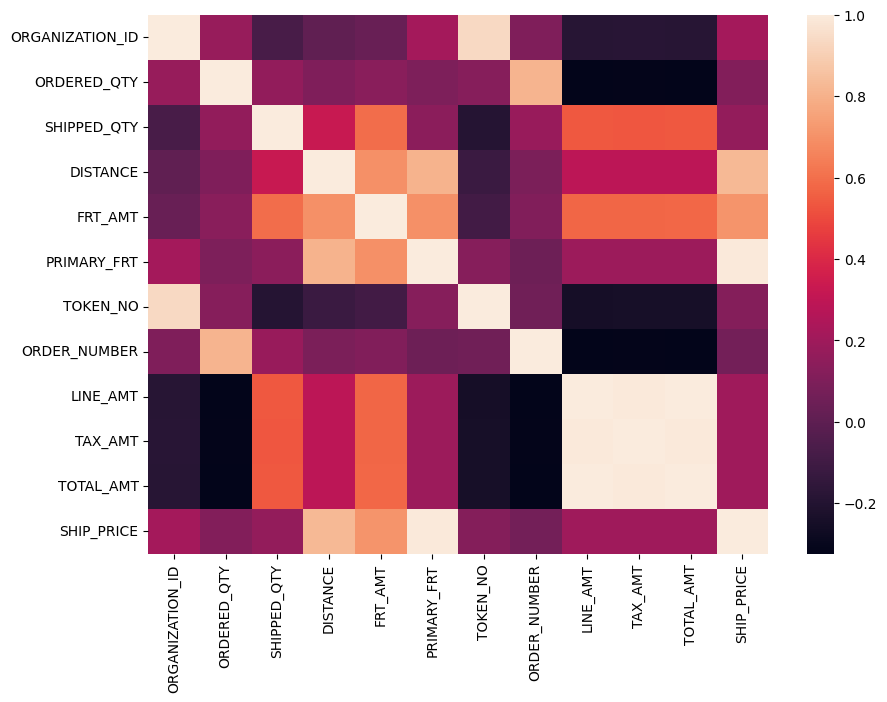

In [ ]:
# checking correlation between numerical columns
num_matrix = dispatch_info[num_cols].corr()
plt.figure(figsize=(10,7))
sns.heatmap(num_matrix, annot=False)
plt.show()

In [ ]:
num_matrix['SHIPPED_QTY'].sort_values(ascending=False)

SHIPPED_QTY        1.000000
FRT_AMT            0.595379
TOTAL_AMT          0.535305
LINE_AMT           0.534857
TAX_AMT            0.532729
DISTANCE           0.322210
ORDER_NUMBER       0.178472
SHIP_PRICE         0.165973
ORDERED_QTY        0.160377
PRIMARY_FRT        0.136842
ORGANIZATION_ID   -0.076307
TOKEN_NO          -0.193308
Name: SHIPPED_QTY, dtype: float64

Interpretation: The factors like taxes, freight amount, distance have some influence on the shipped quantity.

### THANK YOU 😀